In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
path = "https://raw.githubusercontent.com/ovibaridar/Data_sets/main/amazon.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [5]:
data.shape

(20000, 2)

In [6]:
data.describe()

,Positive
count,20000.000000
mean,0.761650
std,0.426085
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [10]:
data["Positive"].value_counts()

Positive
1    15233
0     4767
Name: count, dtype: int64

In [11]:
data = data.rename(columns={'Positive' : "Review"}) 

([<matplotlib.patches.Wedge at 0x18a29ec14d0>,
 [Text(-0.8057580416543408, 0.748835080848488, 'Positive review'),
  Text(0.8057581117653374, -0.7488350054079725, 'Negative review')])

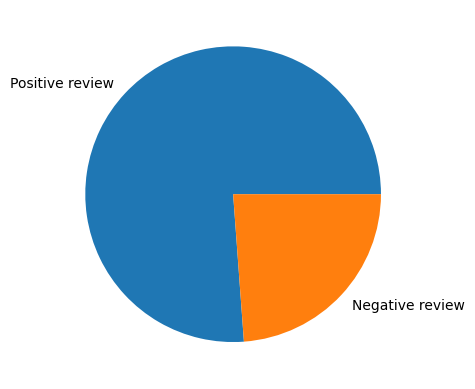

In [12]:
label = ["Positive review" , "Negative review"]
value = data["Review"].value_counts()
plt.pie(labels= label , x = value)

In [13]:
positive_reviews = ' '.join(data[data['Review'] == 1]['reviewText'])
negative_reviews = ' '.join(data[data['Review'] == 0]['reviewText'])

In [14]:
from wordcloud import WordCloud

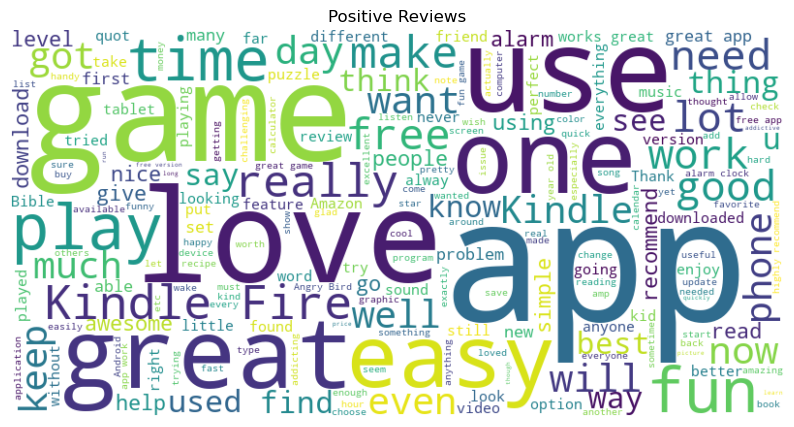

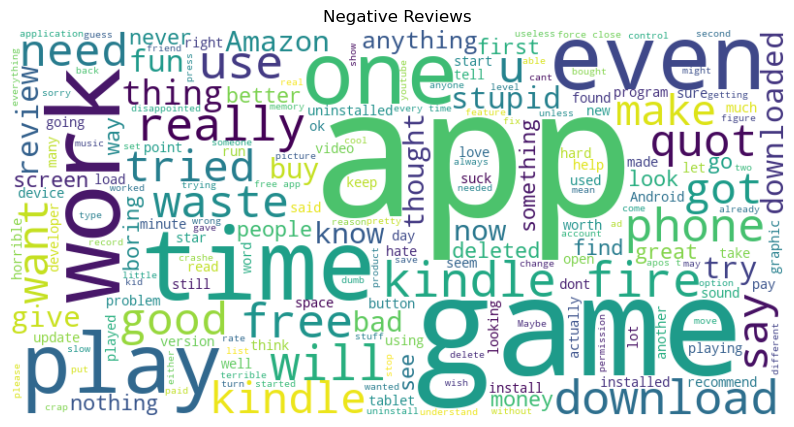

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string

In [17]:
def preprocess_text(text):
    # Step 1: Remove punctuation
    preprocess_punctuation = "".join([char for char in text if char not in string.punctuation])
    
    # Step 2: Remove stopwords
    stopword = set(stopwords.words('english'))
    preprocess_stopword = [word for word in preprocess_punctuation.split() if word.lower() not in stopword]
    
    # Step 3: Lemmatize words
    lemmatizer = WordNetLemmatizer()
    normalized_text = ' '.join([lemmatizer.lemmatize(word) for word in preprocess_stopword])
    
    return normalized_text

In [18]:
data['reviewText'] = data['reviewText'].apply(preprocess_text)

In [19]:
data.head()

,reviewText,Review
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free LOTS different l...,1
2,really cool game bunch level find golden egg s...,1
3,silly game frustrating lot fun definitely reco...,1
4,terrific game pad Hrs fun grandkids love Great...,1


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
Vectorizer = TfidfVectorizer()

In [22]:
x  = Vectorizer.fit_transform(data['reviewText'])
y = data['Review']

In [23]:
from imblearn.over_sampling import RandomOverSampler
rnd = RandomOverSampler()

In [24]:
x , y = rnd.fit_resample(x , y)

In [25]:
y.value_counts()

Review
1    15233
0    15233
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18a2b9a4d50>,
 [Text(6.735557395310444e-17, 1.1, 'Positive review'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative review')])

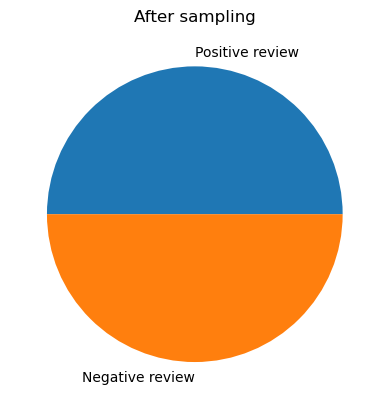

In [26]:
plt.title("After sampling")
label = ["Positive review" , "Negative review"]
value = y.value_counts()
plt.pie(labels= label , x = value)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain , xtest , ytrain , ytest  = train_test_split(x, y ,random_state=41 , test_size=.31)

In [29]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.linear_model import LogisticRegression
mn = MultinomialNB()
bn = BernoulliNB()
lr = LogisticRegression()

In [30]:
mn.fit(xtrain , ytrain)

MultinomialNB()

In [31]:
bn.fit(xtrain , ytrain)

BernoulliNB()

In [32]:
lr.fit(xtrain , ytrain)

LogisticRegression()

In [33]:
print("MultinomialNB Train Score" , mn.score(xtrain , ytrain))
print("BernoulliNB Train Score" , bn.score(xtrain , ytrain))
print("LogisticRegression Train Score" , lr.score(xtrain , ytrain))
print("MultinomialNB Test Score" , mn.score(xtest , ytest))
print("BernoulliNB Test Score" , bn.score(xtest , ytest))
print("LogisticRegression Test Score" , lr.score(xtest , ytest))

MultinomialNB Train Score 0.9316873602587888
BernoulliNB Train Score 0.934113505542077
LogisticRegression Train Score 0.9373483659197945
MultinomialNB Test Score 0.9028057173107464
BernoulliNB Test Score 0.9059820010587613
LogisticRegression Test Score 0.9108523028057173


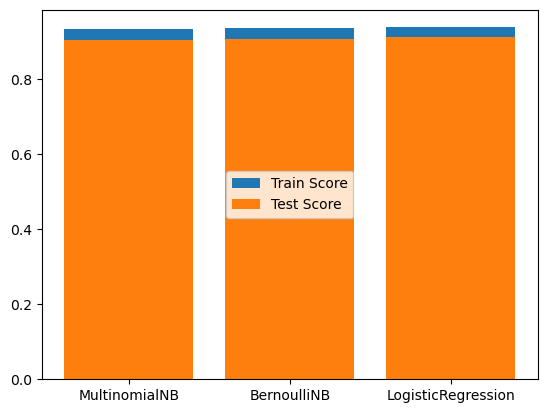

In [34]:
model = ["MultinomialNB" , "BernoulliNB" , "LogisticRegression"]
train_score = [mn.score(xtrain , ytrain) , bn.score(xtrain , ytrain) , lr.score(xtrain , ytrain) ]
test_score = [mn.score(xtest , ytest) , bn.score(xtest , ytest) , lr.score(xtest , ytest) ]
plt.bar(model , train_score , label = "Train Score")
plt.bar(model , test_score , label = "Test Score")
plt.legend(loc='center')

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

In [36]:
print("MultinomialNB" , classification_report(ytest , mn.predict(xtest)))
print("BernoulliNB" , classification_report(ytest , bn.predict(xtest)))
print("LogisticRegression" ,classification_report(ytest , lr.predict(xtest)))

MultinomialNB               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4697
           1       0.92      0.88      0.90      4748

    accuracy                           0.90      9445
   macro avg       0.90      0.90      0.90      9445
weighted avg       0.90      0.90      0.90      9445

BernoulliNB               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4697
           1       0.93      0.88      0.90      4748

    accuracy                           0.91      9445
   macro avg       0.91      0.91      0.91      9445
weighted avg       0.91      0.91      0.91      9445

LogisticRegression               precision    recall  f1-score   support

           0       0.90      0.93      0.91      4697
           1       0.93      0.89      0.91      4748

    accuracy                           0.91      9445
   macro avg       0.91      0.91      0.91      9445
weighted avg       0.91      

In [37]:
cm_MultinomialNB = confusion_matrix(ytest , mn.predict(xtest))
cm_BernoulliNB = confusion_matrix(ytest , bn.predict(xtest))
cm_LogisticRegression = confusion_matrix(ytest , lr.predict(xtest))

MultinomialNB


<Axes: >

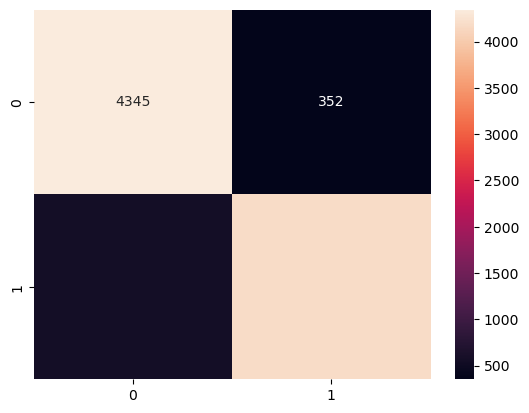

In [38]:
print("MultinomialNB")
sn.heatmap(cm_MultinomialNB , annot=True , fmt = "d")

BernoulliN


<Axes: >

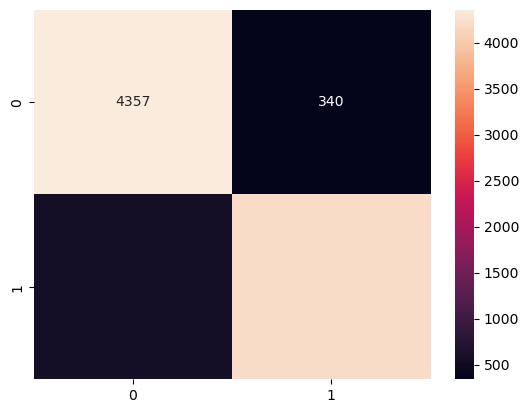

In [39]:
print("BernoulliN")
sn.heatmap(cm_BernoulliNB , annot=True , fmt = "d")

LogisticRegression


<Axes: >

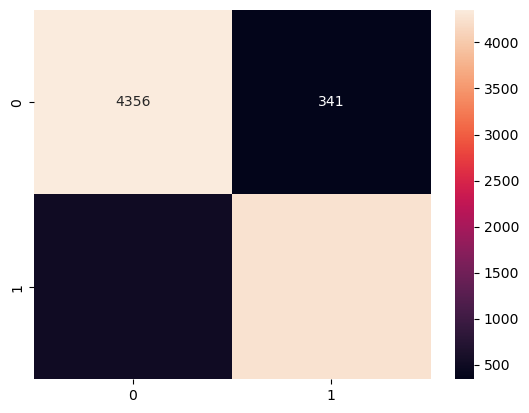

In [40]:
print("LogisticRegression")
sn.heatmap(cm_LogisticRegression , annot=True , fmt = "d")

In [41]:
from sklearn.metrics import RocCurveDisplay

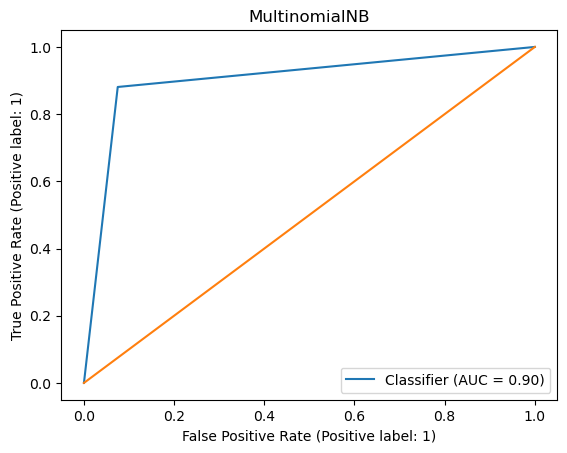

In [42]:
RocCurveDisplay.from_predictions(ytest , mn.predict(xtest))
plt.title("MultinomialNB")
plt.plot([0,1],[0,1])

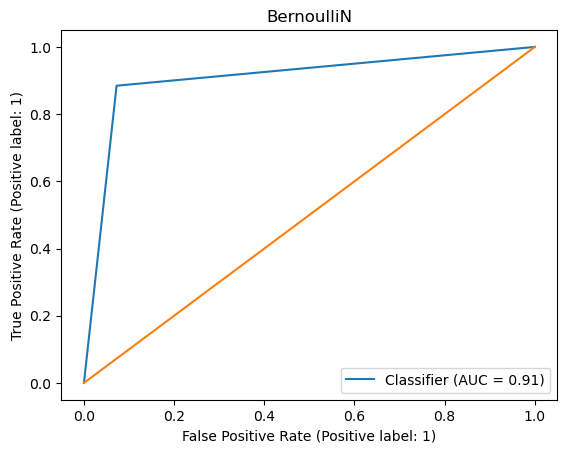

In [43]:
RocCurveDisplay.from_predictions(ytest , bn.predict(xtest))
plt.title("BernoulliN")
plt.plot([0,1],[0,1])

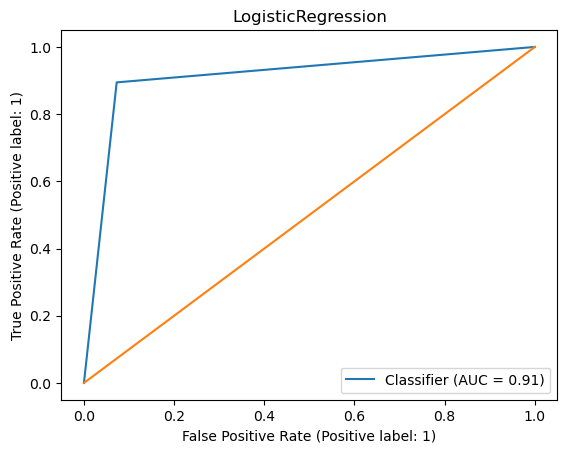

In [44]:
RocCurveDisplay.from_predictions(ytest , lr.predict(xtest))
plt.title("LogisticRegression")
plt.plot([0,1],[0,1])